# 一、微分方程

## 1. 用python求解微分方程

### 1.1 符号解

**例1** 求解下述微分方程的特解
$$
\left\{\begin{array}{l}
\frac{d^{2} y}{d x^{2}}+2 \frac{d y}{d x}+2 y=0 \\
y(0)=0, \quad y^{\prime}(0)=1
\end{array}\right.\tag{例1}
$$

In [1]:
'''
dsolve: dsolve(eq,y(x),ics=con) 
Function(y):声明函数y,也可以用sp.symbols('y',cls=Function)或者sp.var('y',cls=Function)
diff: diff(y(x),x,i),y(x)对x的i阶导数，diff函数还可以对矩阵的元素求导：A.diff(t)
subs: diff(y(x),x).subs(x,0)将表达式中的x赋值为0
'''
#程序文件Pex8_1.py
#用SymPy里的dsolve库求解微分方程
from sympy.abc import x #声明x是变量
from sympy import diff, dsolve, simplify, Function
y=Function('y') #声明y是一个函数，那么后续的y(x)就是一个关于x的函数
eq=diff(y(x),x,2)+2*diff(y(x),x)+2*y(x)  #定义方程
con={y(0): 0, diff(y(x),x).subs(x,0): 1}  #定义初值条件：尤其注意这里y'(0)=1的写法
y=dsolve(eq, ics=con)
print(simplify(y))

Eq(y(x), exp(-x)*sin(x))





**例2** 求解下述微分方程组的特解

$$
\left\{
\begin{aligned}
\frac{dx_1}{dt}=2x_1-3x_2+3x_3 ,\ x_1(0) = 1, \\
\frac{dx_2}{dt}=4x_1-5x_2+3x_3 ,\ x_2(0) = 2, \\
\frac{dx_3}{dt}=4x_1-4x_2+2x_3 ,\ x_3(0) = 3.
\end{aligned}
\right.\tag{例2}
$$

In [2]:
#程序文件Pex8_3_1.py
import sympy as sp
t=sp.symbols('t')
x1,x2,x3=sp.symbols('x1,x2,x3',cls=sp.Function)
eq=[x1(t).diff(t)-2*x1(t)+3*x2(t)-3*x3(t),
    x2(t).diff(t)-4*x1(t)+5*x2(t)-3*x3(t),
    x3(t).diff(t)-4*x1(t)+4*x2(t)-2*x3(t)]

'''
等式也可以用矩阵表达 ：
x=sp.Matrix([x1(t),x2(t),x3(t)])
A=sp.Matrix([[2,-3,3],[4,-5,3],[4,-4,2]])
eq=x.diff(t)-A*x
'''

con={x1(0):1, x2(0):2, x3(0):3}
s=sp.dsolve(eq, ics=con); print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


求得符号解为
$$
\left\{
\begin{aligned}
x_{1}(t)&=2 e^{2 t}-e^{-t}, \\
x_{2}(t)&=2 e^{2 t}-e^{-t}+e^{-2 t}, \\
x_{3}(t)&=2 e^{2 t}+e^{-2 t} .
\end{aligned}
\right.
$$

### 1.2 数值解

   Python 对常微分方程的数值求解是基于一阶方程进行的, 高阶微分方程必须 化成一阶方程组, 通常采用龙格-库塔方法. scipy.integrate 模块的 odeint 函数求常 微分方程的数值解, 其基本调用格式为sol=odeint (func, y0, t).
   其中 func 是定义微分方程的函数或㕆名函数, y0 是初始条件的序列, $\mathrm{t}$ 是一个自 变量取值的序列 ( $\mathrm{t}$ 的第一个元素一定为初始时刻), 返回值 sol 是对应于序列 $\mathrm{t}$ 中元素的数值解, 如果微分方程组中有 $n$ 个函数, 返回值 sol 是 $n$ 列的矩阵, 第 $i(i=1,2, \cdots, n)$ 列对应于第 $i$ 个函数的数值解.

**例 3**  求微分方程
$$
\left\{\begin{array}{l}
y^{\prime}=-2 y+x^{2}+2 x, \\
y(1)=2 .
\end{array}\right.\tag{例 3}
\\在1\le x\le 10步长间隔为0.5点上的数值解
$$

In [3]:
#程序文件Pex8_4.py
from scipy.integrate import odeint
from numpy import arange
dy=lambda y, x: -2*y+x**2+2*x
x=arange(1, 10.5, 0.5)
sol=odeint(dy, 2, x)
print("x={}\n对应的数值解y={}".format(x, sol.T))

x=[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
对应的数值解y=[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


**例4** 求例1的数值解，并在同一个图形界面上画出符号解和数值解的曲线

$$
\left\{
\begin{aligned}
\frac{d^2y}{dx^2}+4 \frac{d y}{d x}+2y = 0 \\
y(0)=0 ,\ y^{'}(0)=0
\end{aligned}
\right.\tag{回顾例1}
$$

**解:**
引进$y_1=y,y_2=y'$,则可以把原来的二阶微分方程化为如下**一阶微分方程组**：(求数值解和画图的程序如下)

$$
\left\{
\begin{aligned}
&y_1'=y_2,& y_1(0)=0 \\
&y_2'=-2y_1-2y_2, &y_2(0)=1
\end{aligned}
\right.\tag{例4}
$$

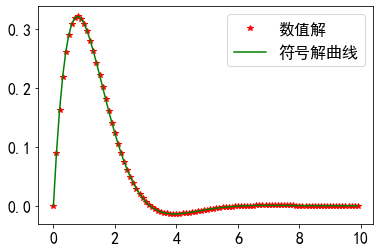

In [4]:
#程序文件Pex8_5.py
from scipy.integrate import odeint
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt
def Pfun(y,x):
    y1, y2=y;
    return np.array([y2, -2*y1-2*y2])
x=np.arange(0, 10, 0.1)  #创建时间点
sol1=odeint(Pfun, [0.0, 1.0], x)  #求数值解
plt.rc('font',size=16); plt.rc('font',family='SimHei')

'''
matplotlib画图显示中文时通常为乱码，想在图形中正确显示中文字符和正负号
plt.rc('font',family='SimHei') 用来显示正常中文标签
plt.rc('axes',unicode_minus=False)用来正常显示负号
'''

plt.plot(x, sol1[:,0],'r*',label="数值解")#数值解的曲线绘制
plt.plot(x, np.exp(-x)*np.sin(x), 'g', label="符号解曲线")#符号解的曲线绘制
plt.legend(); plt.savefig("figure8_5.png"); plt.show()

**例5** Lorenz模型的混沌效应
<br>Lorenz 模型是由美国气象学家 Lorenz 在研究大气运动时, 通过简化对流模型, 只保留 3 个变量提出的一个完全确定性的一阶自治常微分方程组 (不显含时间变量), 其方程为
$$
\left\{\begin{array}{l}
\dot{x}=\sigma(y-x), \\
\dot{y}=\rho x-y-x z, \\
\dot{z}=x y-\beta z .
\end{array}\right.
$$
其中, 参数 $\sigma$ 为 Prandtl 数, $\rho$ 为 Rayleigh 数, $\beta$ 为方向比. <br>Lorenz 模型如今已经 成为混沌领域的经典模型, 第一个混沌吸引子—Lorenz 吸引子也是在这个系统中被发现的. 系统中三个参数的选择对系统会不会进入混沌状态起着重要的作用. 
<br>图 8.2(a) 给出了 Lorenz 模型在 $\sigma=10, \rho=28, \beta=8 / 3$ 时系统的三维演化轨迹. 
<br>由 图 8.2(a) 可见, 经过长时间运行后, 系统只在三维空间的一个有限区域内运动, 即在 三维相空间里的测度为零. 图 8.2(a) 显示出我们经常听到的 “蝴蝶效应”. 图 8.2(b) 给出了系统从两个靠得很近的初值出发 (相差仅 0.0001) 后, 解的偏差演化曲线. 随 着时间的增大, 可以看到两个解的差异越来越大, 这正是动力学系统对初值敏感性 的直观表现, 由此可断定此系统的这种状态为混沌态. 混沌运动是确定性系统中存 在随机性, 它的运动轨道对初始条件极端敏感.

在下面的例子中，我们可以了解到，Lorenz方程中**初始条件的细微变化**所导致的结果差异

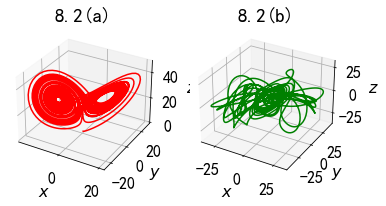

sol1= [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.51228522e-02  1.00353502e+00  4.79004160e-04]
 [ 1.82774668e-01  1.03241643e+00  1.86842924e-03]
 ...
 [-8.11714544e-02 -4.62253844e-01  1.63249369e+01]
 [-1.17747914e-01 -4.69467656e-01  1.58958170e+01]
 [-1.51756328e-01 -4.81345293e-01  1.54781637e+01]] 

 sol1-sol2= [[ 0.00000000e+00 -1.00000000e-04  0.00000000e+00]
 [-9.51228551e-06 -1.00353479e-04 -9.58055863e-08]
 [-1.82774502e-05 -1.03241296e-04 -3.73704777e-07]
 ...
 [ 4.73845276e+00  7.05830089e+00  1.22583772e-01]
 [ 4.98326548e+00  7.55968830e+00 -2.60695739e-01]
 [ 5.25374294e+00  8.08688747e+00 -6.83353812e-01]]


In [21]:
#程序文件Pex8_6.py
from scipy.integrate import odeint
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
def lorenz(w,t):
    sigma=10; rho=28; beta=8/3
    x, y, z=w;
    return np.array([sigma*(y-x), rho*x-y-x*z, x*y-beta*z])
t=np.arange(0, 50, 0.01)  #创建时间点
sol1=odeint(lorenz, [0.0, 1.0, 0.0], t)  #第一个初值问题求解
sol2=odeint(lorenz, [0.0, 1.0001, 0.0], t)  #第二个初值问题求解 将初始条件中的1改为1.0001
plt.rc('font',size=16)
ax1=plt.subplot(121,projection='3d')#确定绘图位置和图像种类
ax1.plot(sol1[:,0], sol1[:,1], sol1[:,2],'r')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$y$'); ax1.set_zlabel('$z$')
ax1.set_title('8.2(a)')
ax2=plt.subplot(122,projection='3d')
ax2.plot(sol1[:,0]-sol2[:,0], sol1[:,1]-sol2[:,1], sol1[:,2]-sol2[:,2],'g')
ax2.set_xlabel('$x$'); ax2.set_ylabel('$y$'); ax2.set_zlabel('$z$')
ax2.set_title('8.2(b)')
plt.show()
print("sol1=",sol1, '\n\n', "sol1-sol2=", sol1-sol2)

## 2.微分方程建模方法
建立微分方程模型一般可分为以下三步:
(1)根据实际要求确定研究的量(自变量、未知函数、必要的参数等),并确定坐标系.
(2)找出这些量所满足的基本规律.
(3)运用这些规律列出方程和定解条件.
### 2.1 按规律直接列方程然后求解
### 2.2 微元分析法——建立微分方程然后求符号解
该方法的基本思想是通过分析研究对象的有关变量在一个很短时间内的变化 规律, 寻找一些微元之间的关系式.
<br>**例6**  有高为 $1 \mathrm{~m}$ 的半球形容器, 水从它的底部小孔流出. 小孔横截面积为 $1 \mathrm{~cm}^{2}$. 开始时容器内盛满了水, 求水从小孔流出过程中容器里水面的高度 $h$ (水面 与孔口中心的距离) 随时间 $t$ 变化的规律.

解 如图 $8.3$ 所示, 以底部中心为坐标原点, 垂直向上为坐标轴的正向建立坐标系.

![eee2ee91b9f8f21c49ce4fcc64bf01f](https://raw.githubusercontent.com/koiiiiifang/plc/main/eee2ee91b9f8f21c49ce4fcc64bf01f.jpg)

由水力学知, 水从孔口流出的流量 $Q$ 为 “通过孔口横截面的水的体积 $V$ 对时 间 $t$ 的变化率”, 满足
$$
Q=\frac{d V}{d t}=0.62 S \sqrt{2 g h},\tag{例6.1}
$$
其中, $0.62$ 为流量系数; $g$ 为重力加速度 (取 $9.8 \mathrm{~m} / \mathrm{s}^{2}$ ), $S$ 为孔口横截面积 (单 位: $\mathrm{m}^{2}$ ), $h$ 为 $t$ 时刻水面高度 (单位: $\mathrm{cm}$ ). 

当 $S=1 \mathrm{~cm}^{2}=0.0001 \mathrm{~m}^{2}$ 时,
$$
d V=0.000062 \sqrt{2 g h} d t .\tag{例6.2}
$$
在微小时间间隔 $[t, t+d t]$ 内, 水面高度由 $h$ 降到 $h+d h($ 这里 $d h<0)$, 容器中 水的体积改变量近似为
$$
d V=-\pi r^{2} d h,\tag{例6.3}
$$
式 (6.3) 中, $r$ 为 $t$ 时刻的水面半径, 右端置负号是由于 $d h<0$, 而 $d V>0$; 这里
$$
r^{2}=\left[1^{2}-(1-h)^{2}\right]=2 h-h^{2} .\tag{例6.4}
$$
由式 (6.2)一(6.4), 得
$$
0.000062 \sqrt{2 g h} d t=\pi\left(h^{2}-2 h\right) d h .
$$
再考虑到初始条件, 得到如下的微分方程模型
$$
\left\{\begin{array}{l}
\frac{d t}{d h}=\frac{10000 \pi}{0.62 \sqrt{2 g}}\left(h^{\frac{3}{2}}-2 h^{\frac{1}{2}}\right), \\
t(1)=0,
\end{array}\right.\tag{例6.5}
$$
利用分离变量法, 可以求得微分方程的解为
$$
t(h)=-15260.5042 h^{\frac{3}{2}}+4578.1513 h^{\frac{5}{2}}+10682.3530 .\tag{例6.6}
$$
上式表达了水从小孔流出的过程中容器内水面高度 $h$ 与时间 $t$ 之间的关系.

### 2.3 模拟近似法——通过合理简化和估计，建立微分方程并代入实际数据检验
## 3. 微分方程建模实例
### 3.1 传染病模型
传染病动力学是用数学模型研究某种传染病在某一地区是否蔓延下去,成为当地的“地方病”,或最终该病将被消除.下面以Kermack和 Mckendrick提出的阙值模型为例说明传染病动力学数学模型的建模过程.

1.模型假设
<br>(1) 被研究人群是封闭的, 总人数为 $n . s(t), i(t)$ 和 $r(t)$ 分别表示 $t$ 时刻人群中 易感染者、感染者 (病人) 和免疫者的人数. 起始条件为 $s_{0}$ 个易感染者, $i_{0}$ 个感染 者, 免疫者 $n-s_{0}-i_{0}$ 个.
<br>(2) 易感人数的变化率与当时的易感人数和感染人数之积成正比, 比例系数 为 $\lambda$.
<br>(3) 免疫者人数的变化率与当时的感染者人数成正比, 比例系数为 $\mu$.
<br>(4) 三类人总的变化率代数和为零.

2.模型建立
根据上述假设, 可以建立如下模型:
$$
\left\{\begin{array}{l}
\frac{d s}{d t}=-\lambda s i, \\
\frac{d i}{d t}=\lambda s i-\mu i, \\
\frac{d r}{d t}=\mu i, \\
s(t)+i(t)+r(t)=n .
\end{array}\right.
\tag{3.1.1}
$$
以上模型又称 Kermack-Mckendrick 方程.

3.模型求解与分析
<br>对于方程 (3.1.1) 无法求出 $s(t), i(t)$ 和 $r(t)$ 的解析解, 转到平面 $s-i$ 上来讨论 解的性质. 由方程 (3.1.1) 中的前两个方程消去 $d t$, 可得
$$
\left\{\begin{array}{l}
\frac{d i}{d s}=\frac{1}{\sigma s}-1, \\
\left.i\right|_{s=s_{0}}=i_{0},
\end{array}\right.
\tag{3.1.2}
$$
其中 $\sigma=\lambda / \mu$, 是一个传染期内每个患者有效接触的平均人数, 称为接触数. 用分 离变量法可求出式(3.1.2)的解为
$$
i=\left(s_{0}+i_{0}\right)-s+\frac{1}{\sigma} \ln \frac{s}{s_{0}}\tag{3.1.3}
$$

![5af8eb400c57453deff73872040603e](https://raw.githubusercontent.com/koiiiiifang/plc/main/5af8eb400c57453deff73872040603e.jpg)
<br>$s$ 与 $i$ 的关系如图 $8.4$ 所示, 从图中可以看出, 当初始值 $s_{0} \leqslant 1 / \sigma$ 时, 传染病不 会蕒延. 患者人数一直在减少并逐渐消失. 而当 $s_{0}>1 / \sigma$ 时, 患者人数会增加, 传 染病开始罗延, 健康者的人数在减少. 当 $s(t)$ 减少至 $1 / \sigma$ 时, 患者在人群中的比例 达到最大值, 然后患者数逐渐减少至零. 由此可知, $1 / \sigma$ 是一个阈值, 要想控制传染 病的流行, 应控制 $s_{0}$ 使之小于此阈值.


<br>由上述分析可知, 要控制疫后有免疫力的此类传染病的流行可通过两个途径: 一是提高卫生和医疗水平, 卫生水平越高, 传染性接触率 $\lambda$ 就越小; 医疗水平越高, 恢复系数 $\mu$ 就越大. 这样, 阈值 $1 / \sigma$ 就越大, 因此提高卫生和医疗水平有助于控制 传染病的萝延. 另一条途径是通过降低 $s{0}$ 来控制传染病的蔓延. 由 $s_{0}+i_{0}+r_{0}=n$ 可知, 要想减少 $s_{0}$ 可通过提高 $r_{0}$ 来实现, 而这又可通过预防接种和群体免疼等措施来实现.

4.参数估计
<br>参数 $\sigma$ 的值可由实际数据估计得到, 记 $s_{\infty}, i_{\infty}$ 分别是传染病流行结束后的健 康者人数和患者人数. 当流行结束后, 患者都将转为免疫者. 所以, $i_{\infty}=0$. 则由 (8.28) 式可得
$$
i_{\infty}=0=s_{0}+i_{0}-s_{\infty}+\frac{1}{\sigma} \ln \frac{s_{\infty}}{s_{0}},
$$
解出 $\sigma$ 得
$$
\sigma=\frac{\ln s_{0}-\ln s_{\infty}}{s_{0}+i_{0}-s_{\infty}} .\tag{3.1.4}
$$
于是, 当已知某地区某种传染病流行结束后的 $s_{\infty}$ 时, 那么可由 (3.1.4) 计算出 $\sigma$ 的值, 而此 $\sigma$ 的值可在今后同种传染病和同类地区的研究中使用.

5.模型应用
<br>这里以 1950 年上海市某全托幼儿所发生的一起水痘流行过程为例, 应用 K-M 模型进行模拟, 并对模拟结果进行讨论. 该所儿童总人数 $n$ 为 196 人; 既往患过水 痘而此次末感染者 40 人, 查不出水痘患病史而本次流行期间感染水痘者 96 人, 既 往无明确水痘史, 本次又末感染的幸免者 60 人. 全部流行期间 79 天, 病例成代出 现, 每代间隔约 15 天. 各代病例数、易感染者数及间隔时间如表 $8.3$ 所示.

| 代   | 病例数 | 易感染者 | 间隔时间/天 |
| :--- | ------ | -------- | ----------- |
| 1    | 1      | 155      |             |
| 2    | 2      | 153      | 15          |
| 3    | 14     | 139      | 32          |
| 4    | 38     | 101      | 46          |
| 5    | 34     | 67       |             |
| 6    | 7      | 33       |             |
| 合计 | 96     |          |             |

以初始值 $s_{0}=155, s_{\infty}=60$ 代入 (3.1.4) 式可得 $\sigma=0.0099$. 将 $\sigma$ 代入 (3.1.3) 可得该流行过程的模拟结果如表 $8.4$ 所列.

| 易感者s | 155  | 153  | 139  | 101  |
| ------- | ---- | ---- | ---- | ---- |
| 病例数i | 1    | 1.7  | 6.0  | 11.7 |

In [6]:
#程序文件Pan8_1.py
import numpy as np
from scipy.integrate import odeint
s0=155.0;  i0=1.0;  s_inf=60.0;
sigma=(np.log(s0)-np.log(s_inf))/(s0+i0-s_inf)
print("sigma=",sigma)
S=np.array([155, 153, 139, 101])
I=(s0+i0)-S+1/sigma*np.log(S/s0)
print("所求的解为：\n",I)

sigma= 0.009886255778095274
所求的解为：
 [ 1.          1.6863383   5.97953014 11.67676321]


###  3.2 SEIR传染病模型

S、E、I、R是传染病流行范围内的四类人群：易感者(Susceptible)、暴露者(Exposed)、感染者(Infectious)、康复者(Recovered)

> * 易感者：未得病，但是缺乏免疫能力，与感染者接触后容易感染
> * 暴露者：接触过感染者，但暂无能力传染给其他人的人，对潜伏期长的传染病适用
> * 感染者：染上传染病的人，可以传播给S类成员，将其变为E类或者I类成员
> * 康复者：被隔离或因病而具有免疫力的人。若免疫期有限，R类成员也可以重新变成S类
![94a75e384e7e31ce03a9f60833fb120](https://raw.githubusercontent.com/koiiiiifang/plc/main/94a75e384e7e31ce03a9f60833fb120.jpg)

| 变量 | 解释  |
| -- | --------------- |
| S | 易感者人数  |
| E | 潜伏者人数  |
| I | 感染者人数  |
| R | 康复者人数  |
|$r_1$ |每个感染者每天接触的平均人数   |
|$r_2$ |每个潜伏者每天接触的平均人数   |
|$\beta_1$ |易感者被感染者感染的概率   |
|$\beta_2$ |易感者被潜伏者感染的概率   |
|$\alpha$ |易感者被感染者感染的概率    |
|$\gamma$ |易感者被感染者感染的概率    |

与上面的K-M模型同样的，我们可以写出如下的微分方程组：


$$
\left\{
\begin{aligned}
\frac{d S}{d t}&= -\frac{r_1\beta_1IS}{N}-\frac{r_2\beta_2ES}{N} \\
\frac{d E}{d t}&= \frac{r_1\beta_1IS}{N}+\frac{r_2\beta_2ES}{N}-\alpha E  \\
\frac{d I}{d t}&=\alpha E-\gamma I \\
\frac{d R}{d t}&=\gamma I
\end{aligned}
\right.
$$
利用积分，可以转化为迭代的差分形式：


$$
\left\{
\begin{aligned}
S_n&=S_{n-1}-\frac{r_1\beta_1I_{n-1}S_{n-1}}{N}-\frac{r_2\beta_2E_{n-1}S_{n-1}}{N} \\
E_n&=E_{n-1}+\frac{r_1\beta_1I_{n-1}S_{n-1}}{N}+\frac{r_2\beta_2E_{n-1}S_{n-1}}{N}-\alpha E_{n-1} \\
I_n&=I_{n-1}+\alpha E_{n-1}-\gamma I_{n-1} \\
R_n&=R_{n-1}+\gamma I_{n-1}
\end{aligned}
\right.
$$

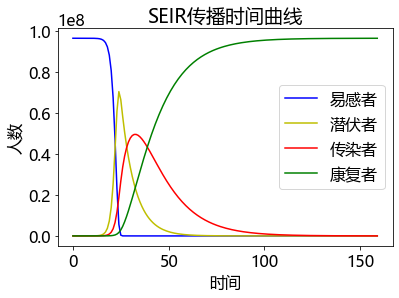

In [7]:
class SEIR:
    def __init__(self, T, N, E, I, R, r1, r2, b1, b2, a, g):
        self.N = N
        self.E = [E]
        self.I = [I]
        self.R = [R]
        self.S = [N - I]
        self.r1 = r1
        self.r2 = r2
        self.b1 = b1
        self.b2 = b2
        self.a = a
        self.g = g
        self.T = T
    
    def calc(self):
        if len(self.T) == len(self.S):
            return
        for i in range(0, len(self.T) - 1):
            self.S.append(self.S[i] - self.r1 * self.b1 * self.S[i] * self.I[i] / self.N - self.r2 * self.b2 * self.S[i] * self.E[i] / self.N)
            self.E.append(self.E[i] + self.r1 * self.b1 * self.S[i] * self.I[i] / self.N - self.a * self.E[i] + self.r2 * self.b2 * self.S[i] * self.E[i] / self.N)
            self.I.append(self.I[i] + self.a * self.E[i] - self.g * self.I[i])
            self.R.append(self.R[i] + self.g * self.I[i])
    
    def plot(self):
        import matplotlib.pyplot as plt
        import matplotlib as mpl
        """
        mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
        mpl.rcParams['font.serif'] = ['Microsoft YaHei']
        mpl.rcParams['axes.unicode_minus'] = False
        mpl.rcParams['text.usetex']=False
        """
        plt.rc('font',family='Microsoft YaHei') 
        plt.rc('axes',unicode_minus=False)
        plt.rc('text',usetex=False)
        
        if len(self.S) == 1:
            self.calc()
        plt.figure()
        plt.title("SEIR传播时间曲线")
        plt.plot(self.T, self.S, color = 'b', label = '易感者')
        plt.plot(self.T, self.E, color = 'y', label = '潜伏者')
        plt.plot(self.T, self.I, color = 'r', label = '传染者')
        plt.plot(self.T, self.R, color = 'g', label = '康复者')
        plt.grid(False)
        plt.legend()
        plt.xlabel("时间")
        plt.ylabel("人数")
        plt.show()

if __name__ == "__main__":
    T = [i for i in range(160)]
    s = SEIR(T, 96400000, 0, 17, 0, 21, 21, 0.048, 0.048, 0.13, 0.066)
    s.plot()

# 二、人工神经网络

## 0. 概述
人工神经网络（artificial neural network, ANN）是人类在对大脑神经网络认识理解的基础上人工构造的能够实现某种功能的神经网络，已在模式识别、预测和控制系统等领域得到广泛的应用，它能够用来解决常规计算难以解决的问题。
<br>人工神经元是人工神经网络的基本构成元素，$X=[x_1,x_2,...,x_m]^T$，
<br>$W=[w_1,w_2,...,w_m]^T$为连接权，于是网络输入$u=\sum_{i=1}^m w_i x_i$，其向量形式为$u=W^T X$。
<br>激活函数也称激励函数、活化函数，用来执行对神经元所获得的网络输入的变换，一般有以下四种。
<br>（1）线性函数
<br>（2）非线性斜面函数
<br>（3）阈值函数/阶跃函数
<br>（4）S形函数
$$
f(u)=a+\frac{b}{1+e^{-du}}
$$
### 0.1 感知器

单层感知器是一个具有一层神经元、采用阈值激活函数的前向网络，通过对网络权值的训练，可以使感知器对一组输入矢量的响应达到0或1的目标输出，从而实现对输入矢量的分类。m为输入神经元的个数。
$$
v=\sum_{i=1}^m w_i x_i +b,\ y=\left\{\begin{aligned}1,\ v \geq 0, \\0, v < 0. \end{aligned} \right.
$$
<br>感知器可以利用其学习规则来调整网络的权值，以便使网络对输入矢量的响应达到0或1的目标输出。
<br>感知器的设计是通过监督式的权值训练来完成的，所以网络的学习过程需要输入和输出样本对。实际上，感知器的样本对是一组能够代表所要分类的所有数据划分模式的判定边界。这些用来训练网络权值的样本是靠设计者来选择的，所以要特别进行选取以便获得正确的样本对。
<br>感知器的学习规则使用梯度下降法，可以证明，如果解存在，则算法在有限次的循环迭代后可以收敛到正确的目标矢量。

### 0.2 BP（back propagation）神经网络

<br>BP神经网络是一种神经网络学习算法，由输入层、中间层和输出层组成，中间层可扩展为多层。相邻层之间各神经元进行全连接，而每层各神经元之间无连接，网络按有监督方式进行学习，当一对学习模式提供网络后，各神经元获得网络的输入响应产生连接权值。然后按减少希望输出与实际输出的误差的方向，从输出层经各中间层逐层修正各连接权值，回到输入层。此过程反复交替进行，直至网络的全局误差趋向给定的极小值，即完成学习过程。

\BP神经网络最大优点是具有极强的非线性映射能力，它主要用于以下四个方面。
<br>（1）函数逼近。用输入向量和相应的输出向量训练一个网络以逼近某个函数。
<br>（2）模式识别。
<br>（3）预测。
<br>（4）数据压缩。减少输出向量维数以便传输或存储。

<br>理论上，对于一个三层或三层以上的BP网络，只要隐层神经元数目足够多，该网络就能以任意精度逼近一个非线性函数。BP神经网络同时具有对外界刺激和输入信息进行联想记忆能力，这种能力使其在图像复原、语言处理、模式识别等方面具有重要作用。BP神经网络对外界输入样本有很强的识别与分类能力，解决了神经网络发展史上的非线性分类难题。BP神经网络还具有优化计算能力，其本质上是一个非线性优化问题，它可以在已知约束条件下，寻找参数组合，使该组合确定的目标函数达到最小。

### 0.3 RBF神经网络

（1）RBF网络结构
<br>RBF神经网络有很强的逼近能力、分类能力和很快的学习速度。其工作原理是把网络看成对未知函数的逼近，任何函数都可以表示成一组基函数的加权和，也即选择各隐层神经元的传输函数，使之构成一组基函数来逼近未知函数。RBF人工神经网络由一个输入层、一个隐层和一个输出层组成。RBF神经网络的隐层基函数有多种形式，常用函数为高斯函数，设输入层的输入为$X=[x_1,x_2,...,x_n]$，实际输出为$Y=[y_1,y_2,...,y_p]$。输入层实现从$X\rightarrow R_i(X)$的非线性映射，输出层实现从$R_i(X)\rightarrow y_k$的线性映射，输出k层第个神经元网络输出为
$$
\hat{y}_k=\sum_{i=1}^m
w_{ik}R_i(X),\ k=1,2,...,p
$$
式中，n为输入层节点数；m为隐层节点数；p为输出层节点数；$w_{ik}$为隐层第i个神经元与输出层第k个神经元的连接权值；$R_i(X)$为隐含层第i个神经元的作用函数，如下式所示
$$
R_i(X)=\exp(-||X-C_i||^2/2\sigma_i^2),\ i=1,2,...,m
$$

$R_i(X)$在$C_i$有一个唯一的最大值，随着$||X-C_i||$的增大，$R_i(X)$迅速衰减到零。对于给定的输入，只有一小部分靠近X的中心被激活。当确定了RBF网络的聚类中心$C_i$、权值$x_{ik}$及$
\sigma_i$以后，就可求出给定某一输入时，网络对应的输出值。
## 1. 理论基础补充

### （1）损失函数：

损失函数表征了训练结果与预期结果之间的差距。常见的损失函数有：

1. 平均绝对误差（MAE）：
   $$\frac{1}{N}\sum_{i=1}^N|y_i-f(x_i)|$$
2. 均方误差（MSE）：
   $$\frac{1}{N}\sum_{i=1}^N(y_i-f(x_i))^2$$
3. 对数误差(log loss)：
   $$-\sum_{i=1}^N\sum_{j=1}^Cy_{ij}log(p_{ij})$$

（其中$N$代表样本数量，$C$代表类别数，$y_{ij}$代表第$i$个样本属于第$j$类的真实标签，$P_{ij}$表示第$i$个样本属于第$j$类的预测概率）

### （2）正则化：

在特征过多时，往往容易出现过拟合现象。于是，我们在损失函数后面加上惩罚项来降低每个特征作用的显著程度，这个过程称为正则化。通常，我们在损失函数中增加所有参数的L1范数或者L2范数（称为L1正则、L2正则）。

### （3）学习速率：

运用梯度下降算法进行优化时，权重的更新规则中，在梯度项前会乘以一个系数，这个系数就叫学习速率$\alpha$.\
如果学习速率太小，则会使收敛过慢；而如果学习速率太大，则会导致代价函数振荡，迭代过快，梯度下降法可能会越过最低点，甚至可能发散。

## 2.sklearn库中常用函数的用法

### （1）Perceptron（）

功能：实现简单的线性可分的分类

函数原型：sklearn.linear_model.Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)

更多细节见：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

### （2）MLPClassifier（）

功能：利用多层感知器，可以实现非线性的分类。

函数原型：sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

更多细节见：https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### （3）MLPRegressor（）

功能：利用多层感知器解决一些较复杂的回归问题

函数原型：sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

更多细节见：https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

### （4）SGDClassifier（）

功能：采用随机梯度下降算法的线性分类器

【随机梯度下降算法的优缺点：\
∙
 对于训练速度来说，随机梯度下降法由于每次仅仅采用一个样本来迭代，训练速度很快。\
∙
 对于精准度来说，随机梯度下降法每次训练仅仅用一个样本决定梯度的方向，可能得到局部最小值，精准度不高。\
∙
 对于收敛速度来说，由于随机梯度下降法一次迭代一个样本，导致迭代方向变化很大，不能很快的收敛到局部最优解。
 
 适合的情形：\
 数据量大，接受局部最优】
 
 函数原型：sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 
 更多细节见：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

 ### 【参数的选择】

【1】损失函数（loss）：一般来说，我们使用相应函数默认的损失函数即可。特别要注意的是，logistic回归（即逻辑回归，常用于层数较少的分类问题）要使用对数误差（log loss）作为损失函数；同时，使用对数误差作为损失函数时也意味着激活函数为S型函数（即logistic回归的激活函数）

【2】正则化项（penalty）：在线性回归里，用L1正则项就变成Lasso回归、用L2正则项就变成Ridge回归、同时使用L1正则项和L2正则项就变成Elastic Net回归；在逻辑回归里也可以选择L1惩罚项或L2惩罚项；在SVM中采用L2正则项来减少过拟合；在Xgboost和LightGBM中也使用L2正则项来减少过拟合。（总结：在一些比较基础的问题中，正则化项的不同选择影响不大）

【3】学习速率（eta0/lerning_rate）及正则化系数（alpha）：不同数据集的最优值不同，若对解的质量有很高的要求，应多次取样尝试，找到尽量优的值。（如补充例题中的做法）

【4】隐层节点（神经元）的数量（hidden_layer_sizes）：有一个经验公式：
$$ N_h=\frac{N_s}{\alpha \cdot(N_i + N_o)}$$
其中，$N_i$是输入层神经元个数，$N_o$是输出层神经元个数，$N_s$是训练集的样本数；$\alpha$是可以自取的任意值变量，通常范围可取 2-10。

【5】求解器(solver)：在MLPClassifier和MLPRegressor两个函数中，我们可以选择如下三个求解器：{‘lbfgs’, ‘sgd’, ‘adam’}.
lbfgs是采用拟牛顿法的求解，sgd采用随机梯度下降，adam则是一种结合动量和自适应学习率的求解。数据量较小时，优先考虑使用lbfgs求解；数据量较大（成千的训练样本乃至更多）时，优先考虑adam求解。

函数原型：

## 3.实例讲解

**例7**. 利用感知器解决简单的分类预测问题
（书上485页例17.3）

采用单一感知器神经元解决简单的分类问题：将四个输入矢量分为两类，其中两个矢量对应的目标值为1，另外两个矢量对应的目标值为0，即输入矢量
        $$
        P=\begin{bmatrix}
        -0.5&-0.5&0.3&0.0\\
        -0.5&0.5&-0.5&1.0
        \end{bmatrix},
        $$
        
其中，每一列是一个输入的取值，且目标分类矢量$T=[1,1,0,0]$。试预测新输入矢量$p=[-0.5,0.2]^T$的目标值。

In [8]:
from sklearn.linear_model import Perceptron
import numpy as np
x0=np.array([[-0.5,-0.5,0.3,0.0],[-0.5,0.5,-0.5,1.0]]).T
y0=np.array([1,1,0,0])
md = Perceptron(tol=1e-3)   #构造模型
md.fit(x0, y0)              #拟合模型
print(md.coef_,md.intercept_)  #输出系数和常数项
print(md.score(x0,y0))   #模型检验
print("预测值为：",md.predict(np.array([[-0.5,0.2]])))

[[-1.3 -0.5]] [0.]
1.0
预测值为： [1]


**例8**. BP网络解决分类预测问题（离散型预测）

（书上488页例17.4）

1981年生物学家格若根（W. Grogan）和维什（W. Wirth）发现了两类飞朦。他们测量了这两类飞朦每个个体的翼长和触角长，数据见表17.3。抓到三只新的飞朦，它们的触角长和翼长分别为(1.24，1.80)，（1.28，1.84），（1.40，2.04），试分别判定它们属于哪一个种类？

![![image.png](attachmentimage.png)](https://raw.githubusercontent.com/koiiiiifang/plc/main/!%5Bimage.png%5D(attachmentimage.png).jpg)


In [9]:
from sklearn.neural_network import MLPClassifier
from numpy import array, r_, ones,zeros
x0=array([[1.14,1.18,1.20,1.26,1.28,1.30,1.24,1.36,1.38,1.38,1.38,1.40,1.48,1.54,1.56],
         [1.78,1.96,1.86,2.00,2.00,1.96,1.72,1.74,1.64,1.82,1.90,1.70,1.82,1.82,2.08]]).T
y0=r_[ones(6),zeros(9)]
md = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=15)
md.fit(x0, y0); x=array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]])
pred=md.predict(x); print("在训练样本集上进行预测的准确度为：",md.score(x0,y0)); print("两个权值矩阵分别为：",md.coefs_)
print("属于各类的概率为：",md.predict_proba(x))
print("三个待判样本点的类别为：",pred)

在训练样本集上进行预测的准确度为： 1.0
两个权值矩阵分别为： [array([[-0.23881896,  6.62037202, -0.4540105 ,  5.8141205 , -7.69823471,
        -4.5148243 ,  5.63339526, -3.15772173,  0.6268659 , -8.55010816,
        -1.28305085, -8.81178548, -1.57773075,  0.97098172, -0.45100047],
       [-0.31895223, -4.57087888,  0.26157037, -4.1304088 ,  5.00274136,
         2.85297943, -3.41780873,  2.1181723 , -1.0125293 , -9.63039542,
         1.69737825,  7.29698107,  0.64513767, -0.86011909,  0.25260335]]), array([[  0.18391789],
       [  4.80757044],
       [  0.41476472],
       [  6.68700827],
       [  1.71407719],
       [ -3.98211077],
       [ -3.05318148],
       [  7.52163281],
       [ 12.30699042],
       [ -4.96585943],
       [-13.65348004],
       [ 13.24702144],
       [  2.98661978],
       [  1.84214482],
       [ -0.07115617]])]
属于各类的概率为： [[0.44838636 0.55161364]
 [0.80299219 0.19700781]
 [0.14849529 0.85150471]]
三个待判样本点的类别为： [1. 0. 1.]


**例9**. BP网络解决回归预测问题（连续型预测）

（书上489页例17.5）

公路运量主要包括客运量和货运量两个方面。据研究，某地区的公路运量主要与该地区的人数、机动车数量和公路面积有关，表中给出了该地区1990年至2009年20年间公路运量的相关数据。根据有关部门数据，该地区2010年和2011年的人数分别为73.39万人、75.55万人，机动车数量分别为3.9635万辆、4.0975万辆，公路面积将分别为0.9880万平方米、1.0268万平方米。请利用BP神经网络预测该地区2010年和2011年的公路客运量和货运量。


0.9858124894401423
客运量的预测值为： [55061.12280978 57254.89331269] 
----------------
0.9920254687888208
货运量的预测值为： [29018.25144487 30262.40112802]


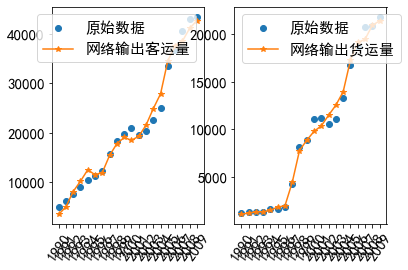

In [11]:
from sklearn.neural_network import MLPRegressor
from numpy import array, loadtxt
from pylab import subplot, plot, show, xticks,rc,legend

#下面两行是mac的
# from matplotlib.font_manager import FontProperties 
# font = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc", size=14)

rc('font',size=15); rc('font',family='SimHei')
a=loadtxt("Pdata17_5.txt"); x0=a[:,:3]; y1=a[:,3]; y2=a[:,4];
md1=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=10)
md1.fit(x0, y1); x=array([[73.39,3.9635,0.988],[75.55,4.0975,1.0268]])
pred1=md1.predict(x); print(md1.score(x0,y1)); 
print("客运量的预测值为：",pred1,'\n----------------'); 
md2=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=10)
md2.fit(x0, y2); pred2=md2.predict(x); print(md2.score(x0,y2)); 
print("货运量的预测值为：",pred2); yr=range(1990,2010)
subplot(121); plot(yr,y1,'o'); plot(yr,md1.predict(x0),'-*')
xticks(yr,rotation=55); legend(("原始数据","网络输出客运量"))
#legend(("原始数据","网络输出客运量"),prop=font)
subplot(122); plot(yr,y2,'o'); plot(yr,md2.predict(x0),'-*')
xticks(yr,rotation=55)
legend(("原始数据","网络输出货运量"),loc='upper left')
# legend(("原始数据","网络输出货运量"),prop=font,loc='upper left')
show()

**【补充例题】**字符识别
<br>sklearn库提供了很多数据集，其中digits中包含了1797个模糊的数字图像及相应的表示数据。下面我们将用神经网络并利用这些数据来实现字符识别。

In [12]:
# -*- coding: utf-8 -*-

"模型的正则化和超参数的获取"

#1 引入需要的包 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
#2 划分数据为训练和测试

def load_data():
    data = load_digits() #load_digits()返回一个字典：{'data':... , 'target':... , ...}其中'data'对应的值是由1797个
                         #长为64的一维数组构成的二维数组；'target'对应的是1797个在0~9中的数（就是'data'中每个一维数组的标签）
                         
    x, y = data.data, data.target
    train_x, test_x, train_y, test_y = train_test_split(x, y , test_size = 0.3, random_state = 20)
#3 标准化数据
    ss = StandardScaler()
    ss.fit(train_x)
    train_x = ss.transform(train_x)
    test_x = ss.transform(test_x)
    return train_x, test_x, train_y, test_y
    

#（画出相应的图像）
def show_img(X):
    images = X.reshape(-1, 8, 8 ) # 格式为（-1， 64,）图片格式为8 * 8
    # 构建绘图
    fig, axi = plt.subplots(3, 5)
    for i, ax in enumerate(axi.flat):
        img = images[i]
        ax.imshow(img, cmap='CMRmap')
        ax.set(xticks=[], yticks=[]) #取消掉两个坐标轴的刻度
    plt.tight_layout()
    plt.show()


#4 进行模型的验证取最佳的超参数和正则化参数
def model_fit(x, y, k = 5):
    learning_rates = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
    penalties = [0, 0.03, 0.01, 0.1, 0.3, 1, 3]
    all_models = []
    for learning_rate in learning_rates:
        for penalty in penalties:
            print('正训练模型:学习速率为%s，正则化系数为%s'%(learning_rate, penalty))
            #建立逻辑回归模型
            model_score = []
            model = SGDClassifier(loss='log', penalty='l2', learning_rate='constant', eta0=learning_rate, alpha=penalty)
            kf = KFold(n_splits=k, shuffle=True, random_state=10)#用于划分训练集和测试集。n_splits：划分样本集的次数。
                                                                 #shuffle：是否打乱样本顺序。random_state：随机数的种子。

            for train_idx, dev_idx in kf.split(x):
                x_train, x_dev = x[train_idx], x[dev_idx]
                y_train, y_dev = y[train_idx], y[dev_idx]
                model.fit(x_train, y_train)
                s = model.score(x_dev, y_dev)
                model_score.append(s)
            all_models.append([np.mean(model_score), learning_rate, penalty])
    print('最优模型：', sorted(all_models, reverse= True)[0])

if __name__ == "__main__":
    train_x, test_x, train_y, test_y = load_data()
        
    print('用以训练的样本数为：%d'%train_x.shape[0])
    print('参与测试的样本数为：%d'%test_x.shape[0])

    
    model_fit(train_x, train_y)
    
    model = SGDClassifier(loss='log', penalty='l2',learning_rate="constant", alpha=0.01, eta0=0.01)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
#     print(test_y)
#     print(y_pred)
#     show_img(test_x)
    print('在测试集上的正确率为：%f'%model.score(test_x,test_y))

用以训练的样本数为：1257
参与测试的样本数为：540
正训练模型:学习速率为0.001，正则化系数为0
正训练模型:学习速率为0.001，正则化系数为0.03
正训练模型:学习速率为0.001，正则化系数为0.01
正训练模型:学习速率为0.001，正则化系数为0.1
正训练模型:学习速率为0.001，正则化系数为0.3
正训练模型:学习速率为0.001，正则化系数为1
正训练模型:学习速率为0.001，正则化系数为3
正训练模型:学习速率为0.003，正则化系数为0
正训练模型:学习速率为0.003，正则化系数为0.03
正训练模型:学习速率为0.003，正则化系数为0.01
正训练模型:学习速率为0.003，正则化系数为0.1
正训练模型:学习速率为0.003，正则化系数为0.3
正训练模型:学习速率为0.003，正则化系数为1
正训练模型:学习速率为0.003，正则化系数为3
正训练模型:学习速率为0.01，正则化系数为0
正训练模型:学习速率为0.01，正则化系数为0.03
正训练模型:学习速率为0.01，正则化系数为0.01
正训练模型:学习速率为0.01，正则化系数为0.1
正训练模型:学习速率为0.01，正则化系数为0.3
正训练模型:学习速率为0.01，正则化系数为1
正训练模型:学习速率为0.01，正则化系数为3
正训练模型:学习速率为0.03，正则化系数为0
正训练模型:学习速率为0.03，正则化系数为0.03
正训练模型:学习速率为0.03，正则化系数为0.01
正训练模型:学习速率为0.03，正则化系数为0.1
正训练模型:学习速率为0.03，正则化系数为0.3
正训练模型:学习速率为0.03，正则化系数为1
正训练模型:学习速率为0.03，正则化系数为3
正训练模型:学习速率为0.1，正则化系数为0
正训练模型:学习速率为0.1，正则化系数为0.03
正训练模型:学习速率为0.1，正则化系数为0.01
正训练模型:学习速率为0.1，正则化系数为0.1
正训练模型:学习速率为0.1，正则化系数为0.3
正训练模型:学习速率为0.1，正则化系数为1
正训练模型:学习速率为0.1，正则化系数为3
正训练模型:学习速率为0.3，正则化系数为0
正训练模型:学习速率为0.3，正则化系数为0.03
正训练模型:学习速率为0.3，正则化系数为0.01

# 三、**时间序列分析**

时间序列是按时间顺序排列的、随时间变化且相互关联的数据序列。对时间序列进行观察研究，找寻它的发展规律，预测它将来的走势就是时间序列分析。

## 1. 分类

（1）移动平均法，根据项数的不同可分为一次移动平均，二次移动平均等。
<br>（2）指数平滑法，按照时间顺序对数据进行加权平均。
<br>（3）平稳时间序列和非平稳时间序列

## 2. 移动平均法

设观测序列为$y_1,y_2,\cdots ,y_T$，设移动平均的项数N< T,。一次移动平均值计算公式为：
$$
M_t^{(1)}(N)=\dfrac{1}{N}(y_t+y_{t-1}+\cdots +y_{t-N+1})=\dfrac{1}{N} \sum_{i=0}^{N-1} y_{t-i}
$$
则有
$$
M_t^{(1)}(N)=M_{t-1}{(1)}(N)+\dfrac{1}{N} (y_t -y_{t-N})
$$
$t+1$期的预测值为$\hat{y}_{t+1}=M_t^{(1)}(N)$，其预测标准误差为$S=\sqrt{\dfrac{\sum\limits_{t=N+1}^{T} (\hat{y}_t-y_t)^2}{T-N}}$。
如果将$\hat{y}_{t+1}$作为t+1期的实际值，那么就可以用$\hat{y}_{t+1}=M_t^{(1)}(N)$计算第t+2期预测值$\hat{y}_{t+2}$。
一般地，也可相应地求得以后各期的预测值。但由于越远时期的预测，误差越大，因此一次移动平均法一般仅应用于一个时期后的预测值（即预测第t+1期）。

**例10**
汽车配件某年1~12月份的化油器销售量(单位:只)统计数据见表10中第2行,试用一次移动平均法预测下一年1月份的销售量.

**表10 化油器销售量及一次移动平均法预测值表**

| 月份 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 预测 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| y_(i) | 423 | 358 | 434 | 445 | 527 | 429 | 426 | 502 | 480 | 384 | 427 | 446 |  |
| N=3 |  |  |  | 405 | 412 | 469 | 467 | 461 | 452 | 469 | 455 | 430 | 419 |
| N=5 |  |  |  |  |  | 437 | 439 | 452 | 466 | 473 | 444 | 444 | 448 |


In [14]:
import numpy as np
y=np.array([423,358,434,445,527,429,426,502,480,384,427,446])
def MoveAverage(y,N):
    Mt=['*']*N #填补空位
    for i in range(N+1,len(y)+2):
        M=y[i-(N+1):i-1].mean() #求均值
        Mt.append(M)
    return Mt
yt3=MoveAverage(y,3) 
s3=np.sqrt(((y[3:]-yt3[3:-1])**2).mean()) #求标准差
yt5=MoveAverage(y,5)
s5=np.sqrt(((y[5:]-yt5[5:-1])**2).mean())
print('N=3时,预测值：',yt3,'，预测的标准误差：',s3)
print('N=5时,预测值：',yt5,'，预测的标准误差：',s5)

N=3时,预测值： ['*', '*', '*', 405.0, 412.3333333333333, 468.6666666666667, 467.0, 460.6666666666667, 452.3333333333333, 469.3333333333333, 455.3333333333333, 430.3333333333333, 419.0] ，预测的标准误差： 56.57519850976887
N=5时,预测值： ['*', '*', '*', '*', '*', 437.4, 438.6, 452.2, 465.8, 472.8, 444.2, 443.8, 447.8] ，预测的标准误差： 39.815861878689226


In [15]:
##另一种写法
import numpy as np
y=np.array([423,358,434,445,527,429,426,502,480,384,427,446])
n1=3; 
yt1=np.convolve(np.ones(n1)/n1,y)[n1-1:-n1+1] #卷积，等量加权，去头尾
s1=np.sqrt(((y[n1:]-yt1[:-1])**2).mean())
n2=5; 
yt2=np.convolve(np.ones(n2)/n2,y)[n2-1:-n2+1]
s2=np.sqrt(((y[n2:]-yt2[:-1])**2).mean())
print('N=3时,预测值：',yt1,'，预测的标准误差：',s1)
print('N=5时,预测值：',yt2,'，预测的标准误差：',s2)

N=3时,预测值： [405.         412.33333333 468.66666667 467.         460.66666667
 452.33333333 469.33333333 455.33333333 430.33333333 419.        ] ，预测的标准误差： 56.57519850976887
N=5时,预测值： [437.4 438.6 452.2 465.8 472.8 444.2 443.8 447.8] ，预测的标准误差： 39.81586187868923


### 二次移动平均法

当预测变量的基本趋势发生变化时，一次移动平均法不能迅速适应这种变化。当时间序列的变化为线性趋势时，一次移动平均法的滞后偏差使预测值偏低，不能进行合理的趋势外推。
二次移动平均值计算公式为:
$$
M_t^{(2)}=\dfrac{1}{N}(M_t^{(1)}+\cdots+M_{t-N+1}^{(1)})=M_{t-1}^{(2)}+\dfrac{1}{N}(M_t^{(1)}-M_{t-N}^{(1)})
$$
当预测目标的基本趋势是在某一水平上下波动时，可用一次移动平均方法建立预测模型。当预测目标的基本趋势与某一线性模型相吻合时，常用二次移动平均法。但序列同时存在线性趋势与周期波动时，可用趋势移动平均法建立预测模型:
$$
\hat{y}_{T+m}=a_T+b_T m, m=1,2, \cdots 
$$
其中
$$
a_T=2M_T^{(1)}-M_T^{(2)},b_T=\dfrac{2}{N-1}(M_T^{(1)}-M_T^{(2)})
$$

## 3. 指数平滑法

一次移动平均实际上认为最近期数据对未来值影响相同，都加权，而期以前的数据对未来值没有影响，加权为0。但是，二次及更高次移动平均的权数却不是，且次数越高，权数的结构越复杂，但永远保持对称的权数，即两端项权数小，中间项权数大，不符合一般系统的动态性。一般说来历史数据对未来值的影响是随时间间隔的增长而递减的。所以，更切合实际的方法应是对各期观测值依时间顺序进行加权平均作为预测值。指数平滑法可满足这一要求，而且具有简单的递推形式。
指数平滑法根据平滑次数的不同，又分为一次指数平滑法和二次指数平滑法等。指数平滑最适合用于简单的时间序列分析和中、短期预测。

### 3.1 一次指数平滑法

#### 3.1.1 公式
#### 3.1.2 加权系数的选择

在进行指数平滑时，加权系数的选择是很重要的。𝛼的大小规定了在新预测值中新数据和原预测值所占的比重,𝛼值越大，新数据所占的比重就愈大，原预测值所占的比重就愈小，反之亦然。
$$
\hat{y}_{t+1}=\hat{y}_t+\alpha(y_t-\hat{y}_t)
$$
上式不难看出，新预测值是根据预测误差对原预测值进行修正而得到的。α的大小则体现了修正的幅度，α值愈大，修正幅度愈大；α值愈小，修正幅度也愈小。
选择α的值可以遵循以下规则：
<br>(i）如果时间序列波动不大，比较平稳，则𝛼α应取小一点，如0.1～0.5，以减少修正幅度，使预测模型能包含较长时间序列的信息；
<br>(ii）如果时间序列具有迅速且明显的变动倾向，则α应取大一点，如0.6～0.8，使预测模型灵敏度高一些，以便迅速跟上数据的变化。
在实用上，类似移动平均法，多取几个值进行试算，看哪个预测误差小，就采用哪个。

#### 3.1.3 初始值的确定

用一次指数平滑法进行预测，除了选择合适的α外，还要确定初始值$S_0^{(1)}$。
初始值是由预测者估计或指定的。当时间序列的数据较多，比如在20个以上时，初始值对以后的预测值影响很少，可选用第一期数据为初始值。如果时间序列的数据较少，在20个以下时，初始值对以后的预测值影响很大，这时，就必须认真研究如何正确确定初始值。一般以最初几期实际值的平均值作为初始值。

**例11**
某产品的11期价格如表11所示.试预测该产品第12期的价格.

表11 某产品价格及指数平滑预测值计算表

| 时期 t | 价格 y_(t) | 预测值 $(\hat y)_(t)$($\alpha$ =0.2) | 预测值 $(\hat y)_(t)$($\alpha$ =0.5) | 预测值 $(\hat y)_(t)$($\alpha$ =0.8) |
| :---: | :--- | :---: | :---: | :---: |
| 1 | 4.81 | 4.805 | 4.805 | 4.805 |
| 2 | 4.8 | 4.806 | 4.808 | 4.809 |
| 3 | 4.73 | 4.805 | 4.804 | 4.802 |
| 4 | 4.7 | 4.790 | 4.767 | 4.744 |
| 5 | 4.7 | 4.772 | 4.733 | 4.709 |
| 6 | 4.73 | 4.757 | 4.717 | 4.702 |
| 7 | 4.75 | 4.752 | 4.723 | 4.724 |
| 8 | 4.75 | 4.752 | 4.737 | 4.745 |
| 9 | 5.43 | 4.751 | 4.743 | 4.749 |
| 10 | 5.78 | 4.887 | 5.087 | 5.294 |
| 11 | 5.85 | 5.066 | 5.433 | 5.683 |
| 12 |  |  |  | 5.817 |


In [16]:
import numpy as np
import pandas as pd
y=np.array([4.81,4.8,4.73,4.7,4.7,4.73,4.75,4.75,5.43,5.78,5.85])
def ExpMove(y,a): #计算前n项的预测值
    n=len(y); M=np.zeros(n); M[0]=(y[0]+y[1])/2
    for i in range(1,len(y)):
        M[i]=a*y[i-1]+(1-a)*M[i-1]
    return M
yt1=ExpMove(y,0.2); yt2=ExpMove(y,0.5)
yt3=ExpMove(y,0.8); s1=np.sqrt(((y-yt1)**2).mean())
s2=np.sqrt(((y-yt2)**2).mean())
s3=np.sqrt(((y-yt3)**2).mean())
d=pd.DataFrame(np.c_[yt1,yt2,yt3])
f=pd.ExcelWriter("Pdata18_2.xlsx")
d.to_excel(f); f.close()  #数据写入Excel文件，便于做表
print("预测的标准误差分别为：",s1,s2,s3)  #输出预测的标准误差
yh=0.8*y[-1]+0.2*yt3[-1]
print("下一期的预测值为：",yh)

预测的标准误差分别为： 0.4148362642161784 0.32164247683489516 0.25883473030674825
下一期的预测值为： 5.8165517935616


### 3.2 二次指数平滑法

一次指数平滑法虽然克服了移动平均法的缺点。但当时间序列的变动出现直线趋势时，用一次指数平滑法进行预测，仍存在明显的滞后偏差。因此，也必须加以修正。再作二次指数平滑，利用滞后偏差的规律建立直线趋势模型，这就是二次指数平滑法。其计算公式为：
$$
\begin{cases}
   S_t^{(1)}=\alpha y_t+(1-\alpha)S_{t-1}{(1)}\\
   S_t^{(2)}=\alpha S_t^{(1)}+(1-\alpha)S_{t-1}^{(2)}
\end{cases}
$$
当时间序列从某时期开始具有直线趋势时，可用直线趋势模型
$$
\hat{y}_{t+m}=a_t+b_t m, m=1,2,\cdots
$$

$$
\begin{cases}
a_t=2S_t^{(1)}-S_t^{(2)}\\
b_t=\dfrac{\alpha}{1-\alpha}(S_t^{(1)}-S_t^{(2)})
\end{cases}
$$



**例12** 
<br>已知某厂10期的钢产量如表12所示，试预测第11，12期的钢产量.
<br>表12某厂10期的钢产量及预测值

| t | 钢产量 $y_(t)$ | 一次平滑值 | 二次平滑值 | 预测值 $(\hat y)_(t)$ |
| --- | --- | --- | --- | --- |
| 1 | 2031 | 2031 | 2031 |  |
| 2 | 2234 | 2091.9 | 2049.27 | 2031 |
| 3 | 2566 | 2234.13 | 2104.728 | 2152.8 |
| 4 | 2820 | 2409.891 | 2196.277 | 2418.99 |
| 5 | 3006 | 2588.724 | 2314.011 | 2715.054 |
| 6 | 3093 | 2740.007 | 2441.81 | 2981.171 |
| 7 | 3277 | 2901.105 | 2579.598 | 3166.002 |
| 8 | 3514 | 3084.973 | 2731.211 | 3360.4 |
| 9 | 3770 | 3290.481 | 2898.992 | 3590.348 |
| 10 | 4107 | 3535.437 | 3089.925 | 3849.752 |
| 11 |  |  |  | 4171.882 |
| 12 |  |  |  | 4362.815 |

In [18]:
import numpy as np
import pandas as pd
y=np.loadtxt('Pdata18_3.txt')
n=len(y); alpha=0.3; yh=np.zeros(n)
s1=np.zeros(n); s2=np.zeros(n)
s1[0]=y[0]; s2[0]=y[0]
for i in range(1,n):
    s1[i]=alpha*y[i]+(1-alpha)*s1[i-1]
    s2[i]=alpha*s1[i]+(1-alpha)*s2[i-1]
    yh[i]=2*s1[i-1]-s2[i-1]+alpha/(1-alpha)*(s1[i-1]-s2[i-1])
at=2*s1[-1]-s2[-1]; bt=alpha/(1-alpha)*(s1[-1]-s2[-1]) #计算直线趋势方程的a和b
m=np.array([1,2])
yh2=at+bt*m
print("预测值为：",yh2)
d=pd.DataFrame(np.c_[s1,s2,yh])
f=pd.ExcelWriter("Pdata18_3.xlsx")
d.to_excel(f); f.close()

预测值为： [4171.88192538 4362.81543832]


### 3.3 三次指数平滑法

当时间序列的变动表现为二次曲线趋势时，则需要用三次指数平滑法。三次指数平滑实在二次指数平滑的基础上，再进行一次外推，其计算公式为：
$$
\begin{cases}
    S_t^{(1)}=ay_t+(1-\alpha)S_{t-1}^{(1)}\\
    S_t^{(2)}=\alpha S_t^{(1)}+(1-\alpha)S_{t-1}^{(2)}\\
    S_t^{(3)}=\alpha S_t^{(2)}+(1-\alpha)S_{t-1}^{(3)}
\end{cases}
$$
其预测模型为：
$$
\hat{y}_{t+T}=a_t+b_t T+c_t T^2
$$
其中
$$
\begin{cases}
    a_t=3S_t^{(1)}-3S_t^(2)+S_t^{(3)}\\
    b_t=\dfrac{\alpha}{2(1-\alpha)^2}[(6-5\alpha)S_t^{(1)}+(4-3\alpha)S_t^{(3)}]\\
    c_t=\dfrac{\alpha^2}{2(1-\alpha)^2}[S_t^{(1)}-2S_t^{(2)}+S_t^{(3)}]
\end{cases}
$$

## 4. 平稳时间序列分析

### 4.1 协方差的定义：

$$
\gamma_{t,s}=COV(X_t,X_s)=E[(X_t-\mu_t)(X_s-\mu_s)]
$$

对于一个时间序列{X_t},如果它满足以下条件：

（1）均值
$$
E(X_t)=m
$$
是与时间t无关的函数。

（2）方差
$$
Var(X_t)=s^2
$$
是与时间t无关的函数。

（3）协方差
$$
COV(X_t,X_{t+k})
$$
仅与间隔k有关，与时间t无关。
那么该时间序列是平稳的。

**例13** 试利用太阳黑子个数文件 sunspots.csv,建立适当的ARMA模型,并预测1989年太阳黑子个数.

1. 第一步：判断观测数据是否是平稳的
2. 第二步：确定ARMA模型
3. 第三步：计算结果并对残差进行分析

## 5. 非平稳时间序列分析

差分运算：
$$
\Delta^d X_t=\sum_{i=0}^d (-1)^i C_d^i X_{t-i}
$$
在实践操作中，我们会根据序列不同的特点选择合适的差分方式，常见情况有以下三种：
<br>（1）序列蕴含着显著的线性趋势，一阶差分就可以实现平稳。
<br>（2）序列蕴含着曲线趋势，通常二阶或三阶差分就可以提取曲线趋势的影响。
<br>（3）对于蕴含着固定周期的序列进行步长为周期长度的差分运算，通常可以较好地提取周期信息。

**例14** 试利用文件 austa.csv,建立适当的 ARIMA模型.


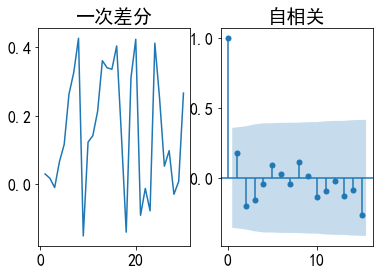

In [19]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes',unicode_minus=False)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
df=pd.read_csv('austa.csv')
plt.subplot(1,2,1); plt.plot(df.value.diff()) #差分
plt.title('一次差分')
ax2=plt.subplot(1,2,2)
plot_acf(df.value.diff().dropna(), ax=ax2,title='自相关') #dropna缺失值删除
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   5.753
Date:                Wed, 31 Aug 2022   AIC                             -5.507
Time:                        20:27:06   BIC                             -1.303
Sample:                             0   HQIC                            -4.162
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4963      0.196      2.532      0.011       0.112       0.880
ar.L2          0.0485      0.215      0.225      0.822      -0.373       0.470
sigma2         0.0395      0.012      3.193      0.0

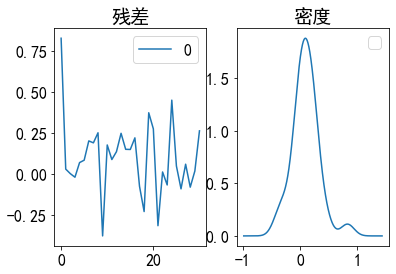

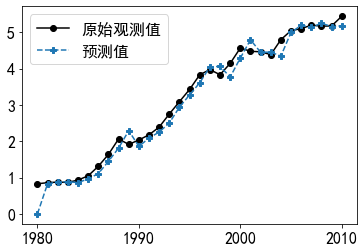

In [20]:
md=sm.tsa.arima.ARIMA(df.value, order=(2,1,0)).fit()
print(md.summary())


residuals = pd.DataFrame(md.resid) #计算残差
fig, ax = plt.subplots(1,2)
residuals.plot(title="残差", ax=ax[0])
residuals.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('')          

zmd=md.predict()  #原始数据与预测值对比图
years=[0]
for i in range(0,31):
    years.append(i+1980)
plt.figure()
plt.plot(years[1:],df.value,'o-k')
plt.plot(years[1:],zmd,'P--')
plt.legend(('原始观测值','预测值'))
plt.show()